In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Core_Functions import gmm_base as gb
from Core_Functions import gmm_plot as gp

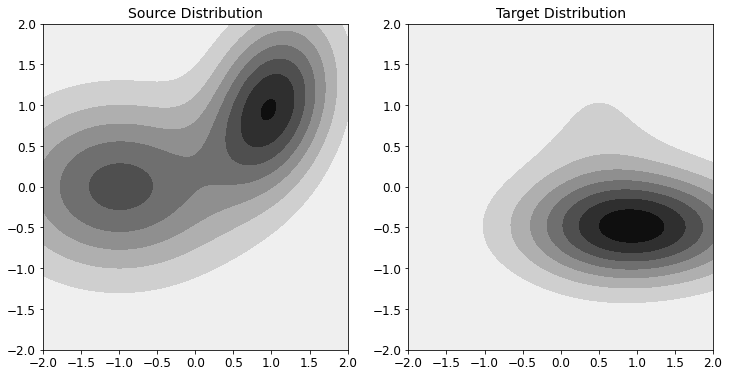

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Source Distribution'}>,
        <AxesSubplot:title={'center':'Target Distribution'}>], dtype=object))

In [2]:
f = gb.Gaussian_Mixture(2,2)
g = gb.Gaussian_Mixture(2,2)

f.assign_w(np.array([0.6,0.4]))
g.assign_w(np.array([0.2,0.8]))

fm = np.zeros([2,2])
gm = np.zeros([2,2])

fcov = np.zeros([2,2,2])
gcov = np.zeros([2,2,2])

fm[0,:] = np.array([-1,0])
fm[1,:] = np.array([1,1])

gm[0,:] = np.array([0.5,0.5])
gm[1,:] = np.array([1,-0.5])

fcov[0,:,:] = np.array([[1,0],[0,0.5]])
fcov[1,:,:] = np.array([[0.3,0.1],[0.1,0.5]])

gcov[0,:,:] = np.array([[0.5,0],[0,1]])
gcov[1,:,:] = np.array([[1,0],[0,0.2]])

f.assign_m(fm)
f.assign_cov(fcov)

g.assign_m(gm)
g.assign_cov(gcov)


gp.Source_Target_2D(f,g,[-2,2],[-2,2])

In [3]:
print(gb.GMM_Transport(f,g,0.01))

(3.2138190594885074, array([[2.6249731e-12, 6.0000000e-01],
       [2.0000000e-01, 2.0000000e-01]]), array([2.09101345, 0.29823199]))


In [4]:
GW, P, alpha = gb.GMM_Transport(f,g,0.01)
print(gb.Wasserstein_Gradients(f,g,P,alpha))

(array([ 0.89639073, -0.89639073]), array([[-2.4,  0.6],
       [ 0.2,  0.8]]), array([[[ 7.68836820e-13,  0.00000000e+00],
        [ 0.00000000e+00,  2.20526681e-01]],

       [[-2.38909798e-01,  6.26962193e-02],
        [ 6.26962193e-02, -1.89375246e-02]]]))


In [5]:
# firstly, each of the step sizes that we will try
steps = np.linspace(0,1,20)
dGW_dw, dGW_dmu, dGW_dsigma = gb.Wasserstein_Gradients(f,g,P,alpha)
GW = np.zeros(20)
i = 0
for a in steps:
    f_a = gb.Gaussian_Mixture(2,2)
    f_a.assign_w(f.w - a * dGW_dw)
    f_a.assign_m(f.m - a * dGW_dmu)
    f_a.assign_cov(f.cov - a * dGW_dsigma)

    GW[i] = gb.GMM_Transport(f_a,g,0.01)[0]
    i += 1

/Users/Jared/opt/anaconda3/lib/python3.8/site-packages/ot/bregman.py:721: RuntimeWarning: invalid value encountered in log
  alpha, beta = alpha + reg * np.log(u), beta + reg * np.log(v)


In [6]:
GW

array([3.21381906, 2.79480889, 2.43190449, 2.12088033, 1.85751015,
       1.63756635, 1.45682002, 1.31104149, 1.19600146, 1.10747315,
       1.04123688, 0.99309177, 0.95889997,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

In [7]:
best = steps[12]

f_new = gb.Gaussian_Mixture(2,2)
f_new.assign_w(f.w - best * dGW_dw)
f_new.assign_m(f.m - best * dGW_dmu)
f_new.assign_cov(f.cov - best * dGW_dsigma)

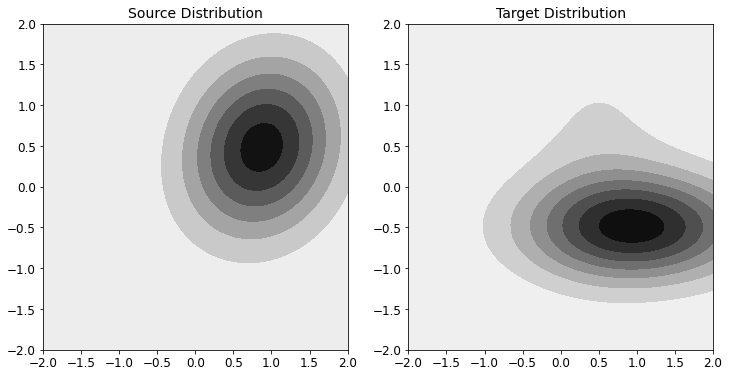

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Source Distribution'}>,
        <AxesSubplot:title={'center':'Target Distribution'}>], dtype=object))

In [8]:
gp.Source_Target_2D(f_new,g,[-2,2],[-2,2])

In [9]:
gb.GMM_Transport(f_new,g,0.01)

(0.9588999744085156,
 array([[5.95089540e-77, 3.38584863e-02],
        [2.00000000e-01, 7.66141514e-01]]),
 array([-0.71344057,  0.2339174 ]))

In [10]:
gb.Wasserstein_Cost(f,g)

array([[2.67157288, 4.31754447],
       [0.62822629, 2.53574913]])

In [11]:
f_new.cov

array([[[1.        , 0.        ],
        [0.        , 0.36071999]],

       [[0.4508904 , 0.06040239],
        [0.06040239, 0.51196054]]])

In [12]:
from Core_Functions import optimisation as op

op.Project_Simplex(np.array([-0.5,-0.2]))

array([0.35, 0.65])

In [16]:
op.Projection(f).w

array([0.6, 0.4])